# <b>INDIA'S TEMPERATURE DATASET</b>

## State-wise and country-wise temperature distribution data since 1901 to       2020

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
sns.set_palette("ch:s=-.2,r=.6")

### Dataset Overview 

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
df_all = pd.read_csv("./Temp_India_1901-2020.csv")
df_all

,Year,State_and_Country,Temperature
0,1901,India,24.26
1,1901,Andaman and Nicobar,27.81
2,1901,Andhra Pradesh,27.04
3,1901,Assam,22.77
4,1901,Delhi,25.27
5,1901,Goa,26.26
6,1901,Gujarat,26.66
7,1901,Haryana,25.09
8,1901,Himachal Pradesh,9.80
9,1901,Karnataka,25.44


In [4]:
df_all.describe()

,Year,Temperature
count,4200.000000,4200.000000
mean,1960.500000,23.474055
std,34.643938,5.067516
min,1901.000000,3.410000
25%,1930.750000,23.050000
50%,1960.500000,25.270000
75%,1990.250000,26.310000
max,2020.000000,29.080000


In [5]:
df_all.isnull().any()

Year                 False
State_and_Country    False
Temperature          False
dtype: bool

### State-wise and Country-wise Scatter plot Temp. Distribution (Y AXIS SHARED)

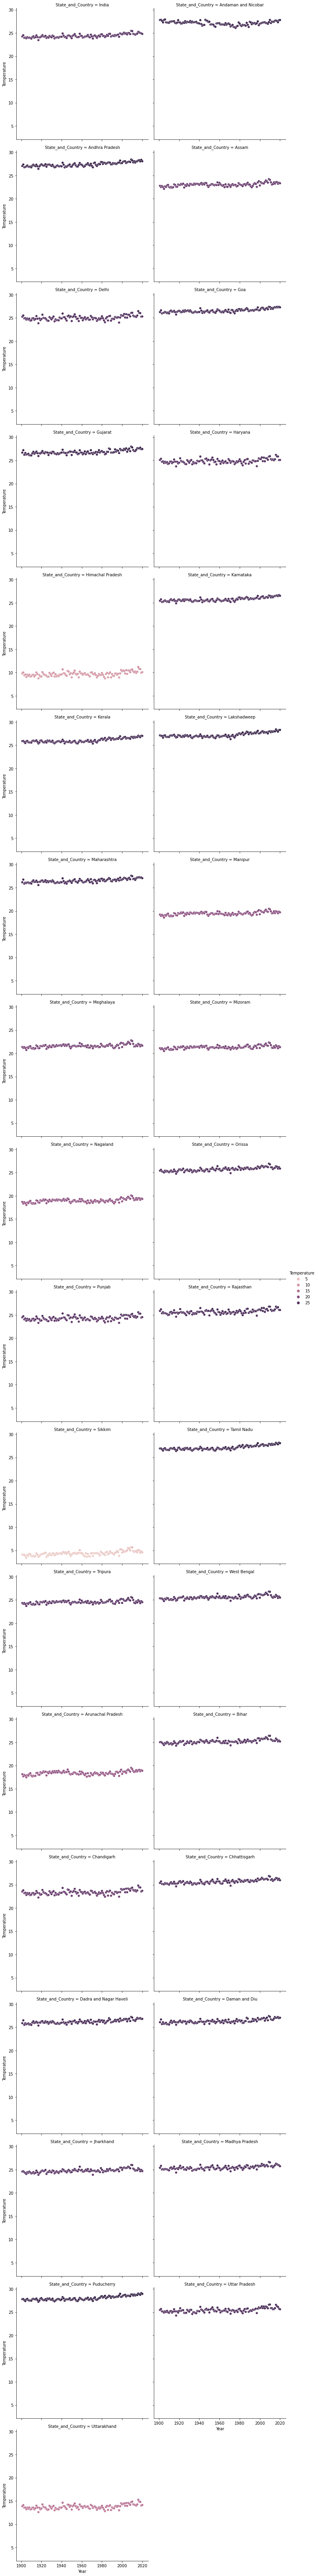

In [6]:
g = sns.relplot(x="Year",
                y="Temperature", 
                hue="Temperature", 
                col="State_and_Country", 
                data=df_all, 
                col_wrap=2,
                facet_kws=dict(sharey=True))

### State-wise and Country-wise Scatter plot Temp. Distribution (Y AXIS UNSHARED)

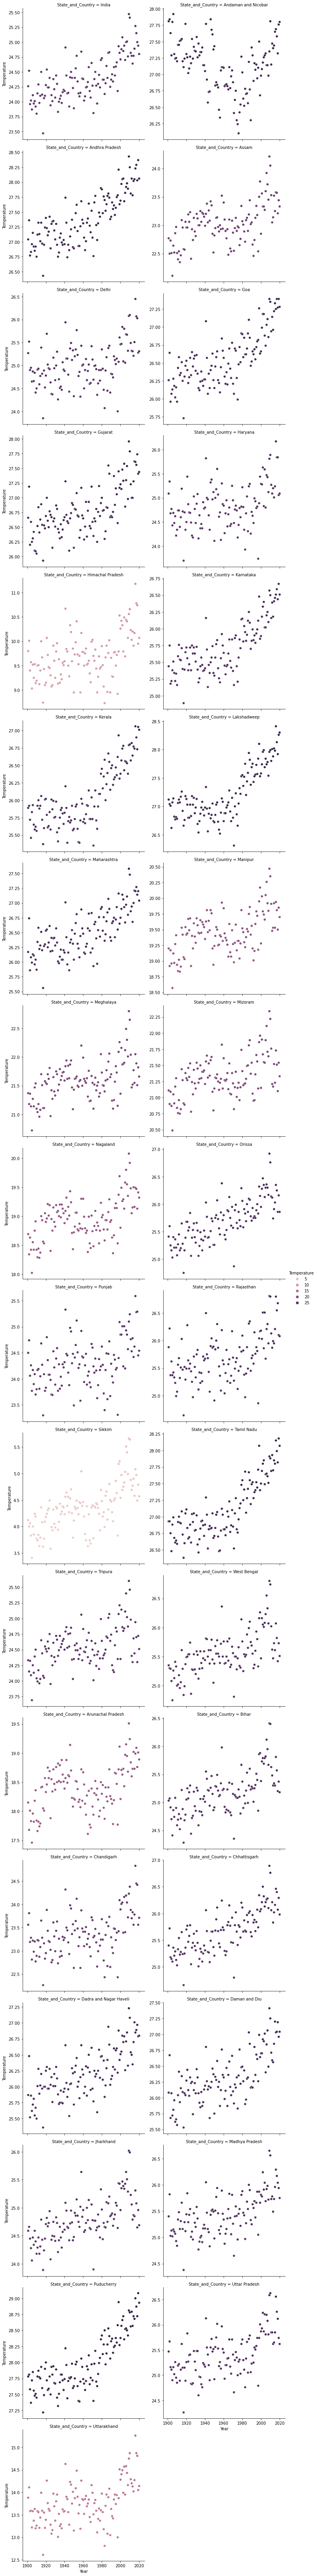

In [7]:
g = sns.relplot(x="Year",
                y="Temperature", 
                hue="Temperature", 
                col="State_and_Country", 
                data=df_all, 
                col_wrap=2,
                facet_kws=dict(sharey=False))

# Getting user input on state or India

### The input for any state is taken and statistics are performed afterwards

In [38]:
place = input()
df_state = df_all[df_all["State_and_Country"]==place]
df_state['Year'] = df_all['Year']
df_state = df_state.reset_index()
del df_state['index']
df_state

Bihar


<ipython-input-38-4629b8ecdfba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['Year'] = df_all['Year']


,Year,State_and_Country,Temperature
0,1901,Bihar,25.03
1,1902,Bihar,25.07
2,1903,Bihar,24.91
3,1904,Bihar,24.70
4,1905,Bihar,24.41
5,1906,Bihar,24.86
6,1907,Bihar,24.74
7,1908,Bihar,25.08
8,1909,Bihar,24.90
9,1910,Bihar,24.59


In [39]:
print(df_state.shape)

(120, 3)


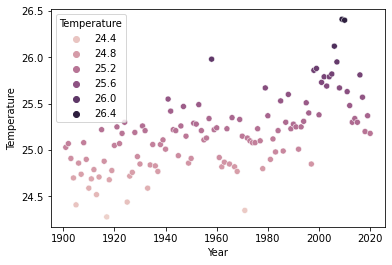

In [40]:
sns.scatterplot(x="Year", y="Temperature", data=df_state, hue="Temperature")
plt.show()

In [11]:
df_state.describe()

,Year,Temperature
count,120.000000,120.000000
mean,1960.500000,23.031250
std,34.785054,0.364707
min,1901.000000,22.110000
25%,1930.750000,22.817500
50%,1960.500000,23.035000
75%,1990.250000,23.222500
max,2020.000000,24.210000


### Calculation of quantiles for selected state's temperature distribution

In [34]:
quan_1 = df_state.Temperature.quantile(0)
quan_2 = df_state.Temperature.quantile(0.25)
quan_3 = df_state.Temperature.quantile(0.5)
quan_4 = df_state.Temperature.quantile(0.75)

### Grouping temperatures into Stage 1, Stage 2 and Stage 3
### Alongwith grouping years before and after 1990 (Global Warming)

In [42]:
df_state['Group'] = ['Stage_1' if x>=quan_1 and x<=quan_2 else 'Stage_2' if x>quan_2 and x<=quan_3 else 'Stage_3' if x>quan_3 else 'Stage_3' for x in df_state['Temperature']]

In [43]:
df_state['Year_Group'] = ['Before 1970' if x>=1901 and x<1970 else 'After 1970' if x>=1970 and x<=2020 else '' for x in df_state['Year']]

In [44]:
df_state

,Year,State_and_Country,Temperature,Group,Year_Group
0,1901,Bihar,25.03,Stage_2,Before 1970
1,1902,Bihar,25.07,Stage_2,Before 1970
2,1903,Bihar,24.91,Stage_2,Before 1970
3,1904,Bihar,24.70,Stage_1,Before 1970
4,1905,Bihar,24.41,Stage_1,Before 1970
5,1906,Bihar,24.86,Stage_1,Before 1970
6,1907,Bihar,24.74,Stage_1,Before 1970
7,1908,Bihar,25.08,Stage_2,Before 1970
8,1909,Bihar,24.90,Stage_2,Before 1970
9,1910,Bihar,24.59,Stage_1,Before 1970


In [45]:
df_cross = pd.crosstab(df_state["Year_Group"], df_state["Group"], margins=True)
print(df_cross);

Group        Stage_1  Stage_2  Stage_3  All
Year_Group                                 
After 1970         3       12       36   51
Before 1970       27       19       23   69
All               30       31       59  120


In [46]:
df_cross = pd.crosstab(df_state["Year_Group"], df_state["Group"], margins=False)
print(df_cross);

Group        Stage_1  Stage_2  Stage_3
Year_Group                            
After 1970         3       12       36
Before 1970       27       19       23


### Presenting crosstabultion form of data to provide insight on stages of temperature progressed into since the period of Global Warming began

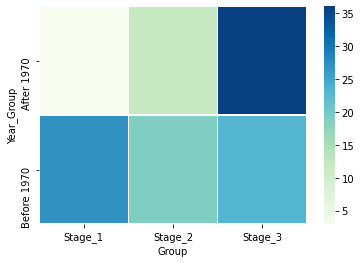

In [47]:
sns.heatmap(df_cross, cmap="GnBu", linewidth=0.5);

# HYPOTHESIS TESTING

#### H0: Year groupings are dependent on temperature groupings
#### H1: Year groupings are independent on temperature groupings

In [48]:
import scipy.stats as stats

In [49]:
chi_value, p, deg, exp_freq = stats.chi2_contingency(df_cross);
print("Chi-Square value: {0}".format(chi_value));
print("p value: {0}".format(p));
print("Degree of Freedom value: {0}".format(deg));

Chi-Square value: 21.42716311094766
p value: 2.224081251116498e-05
Degree of Freedom value: 2


In [50]:
if p<0.05:
    print("We reject the Null Hypothesis");

We reject the Null Hypothesis
